In [7]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path

import matplotlib.pyplot as plt
# # Set the default font size for axis labels
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
# Set the default font size for tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


In [41]:
data_dir = Path('/home/dschneidinger/MagShockZ/simulations/raw_data/magshockz-v2.2.2d-GPU/MS')
# data_dir = Path('/home/dschneidinger/osiris/decks/cuda/MS')
def look_through_data(data_dir:Path, diagnostics:dict):
    for item in data_dir.rglob(''):
        item = item.relative_to(data_dir)
        dirs = item.as_posix().split('/')
        if len(dirs) > 1:
            diagnostics[item.as_posix()] = item.as_posix()

diagnostics = {}
look_through_data(data_dir, diagnostics)

print(diagnostics["DENSITY/electron/charge"])

DENSITY/electron/charge


In [67]:
from matplotlib.animation import FuncAnimation
from IPython import display

import matplotlib.pyplot as plt

# Function to update the plot
fig, ax = plt.subplots()

def update(frame):
    plt.clf()
    c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electron/charge"]}/charge-electron-{frame:06d}.h5')

    # c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Aluminum/charge"]}/charge-Aluminum-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir / diagnostics["FLD/e2"]}/e2-{frame:06d}.h5')
    # c = osh5io.read_h5(f'{data_dir / diagnostics["FLD/j2"]}/j2-{frame:06d}.h5')

    # c = osh5io.read_h5(f'{data_dir / diagnostics["FLD/b3"]}/b3-{frame:06d}.h5')
    osh5vis.osplot(c,cmap = 'hot',vmax =180)
        
    print(f'Frame {frame}')

ani = FuncAnimation(fig, update,frames=35,interval=100)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()


Frame 0
Frame 0
Frame 1
Frame 2
Frame 3
Frame 4
Frame 5
Frame 6
Frame 7
Frame 8
Frame 9
Frame 10
Frame 11
Frame 12
Frame 13
Frame 14
Frame 15
Frame 16
Frame 17
Frame 18
Frame 19
Frame 20
Frame 21
Frame 22
Frame 23
Frame 24
Frame 25
Frame 26
Frame 27
Frame 28
Frame 29
Frame 30
Frame 31
Frame 32
Frame 33
Frame 34


(<matplotlib.image.AxesImage at 0x70eaa0398da0>,
 <matplotlib.colorbar.Colorbar at 0x70eb4c0e3a70>)

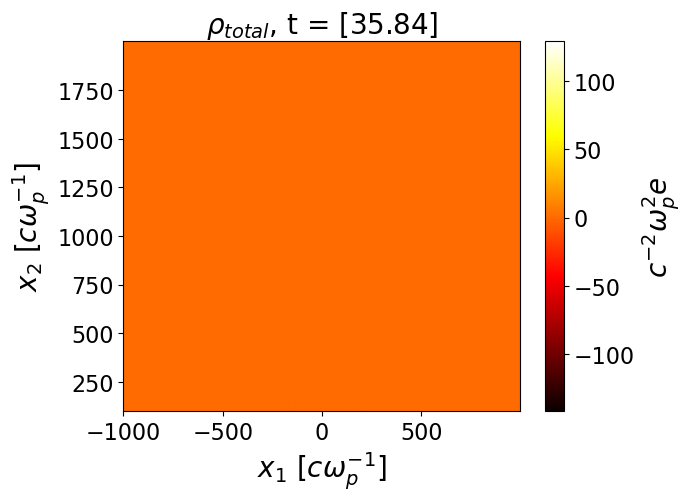

In [59]:
frame= 4
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{frame:06d}.h5')
b = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Aluminum/charge"]}/charge-Aluminum-{frame:06d}.h5')
a = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/electron/charge"]}/charge-electron-{frame:06d}.h5')
# osh5vis.osplot(c,cmap = 'hot',title = r"$Zn_i$" + f", t = {round((c.run_attrs['TIME']/4781.497)[0],3)}" +  r"$\omega_{ci}^{-1}$",vmax = 9)
osh5vis.osplot(c+b+a,cmap = 'hot', title = r"$\rho_{total}$, t = " + f"{(c.run_attrs['TIME'])}")

In [59]:
c = osh5io.read_h5(f'{data_dir / diagnostics["DENSITY/Magnesium/charge"]}/charge-Magnesium-{0:06d}.h5')
plot = osh5vis.osplot(c)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/dschneidinger/MagShockZ/simulations/raw_data/magshockz-v2.0.2d-GPU/MS/UDIST/Aluminum/ufl2/ufl2-Aluminum-000000.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

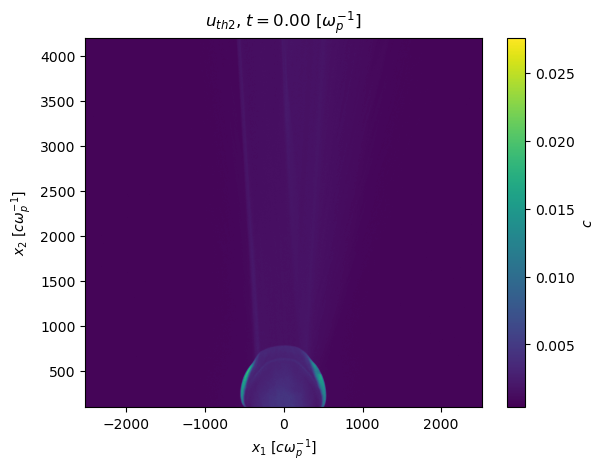

In [10]:
c = osh5io.read_h5(f'{data_dir}/UDIST/Aluminum/uth2/uth2-Aluminum-000000.h5')
plot = osh5vis.osplot(c)
